In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('calculations.csv')

In [3]:
dataset

,Name,Ratio,Time,Size,Parameters,Type
0,FPC,1.269707,222553800,8388608,-,C
1,FPC,1.269707,71465201,8388608,-,D
2,FPC,1.254055,203021900,8388608,-,C
3,FPC,1.254055,56627700,8388608,-,D
4,FPC,1.254363,199764201,8388608,-,C
...,...,...,...,...,...,...
52083,K2Raster,0.497803,55095217749,1048576,-,D
52084,K2Raster,0.791004,70893724288,4194304,-,D
52085,K2Raster,0.954205,86692230828,16777216,-,D
52086,K2Raster,1.617405,102491000000,67108864,-,D


In [4]:
print(pd.unique(dataset['Name']))

['FPC' 'SZ' 'BitGrooming' 'BitShaving' 'DigitRouting' 'K2Raster']


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52088 entries, 0 to 52087
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        52088 non-null  object 
 1   Ratio       52088 non-null  float64
 2   Time        52088 non-null  int64  
 3   Size        52088 non-null  int64  
 4   Parameters  52088 non-null  object 
 5   Type        52088 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ MB


# Graph of the dependence of the compression time on the file size<br>

In [6]:
FPC = dataset[(dataset['Name'] == 'FPC') & (dataset['Type'] == 'C')]
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'C')]
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'C')]
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'C')]
K2Raster = dataset[(dataset['Name'] == 'K2Raster') & (dataset['Type'] == 'C')]
SZ = dataset[(dataset['Name'] == 'SZ') & (dataset['Type'] == 'C')]

In [7]:
FPCTS = FPC[['Time', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
K2RasterS = K2Raster[['Time', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Time', 'Size']].groupby(['Size']).mean()
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Time', 'Size']].groupby(['Size']).mean()

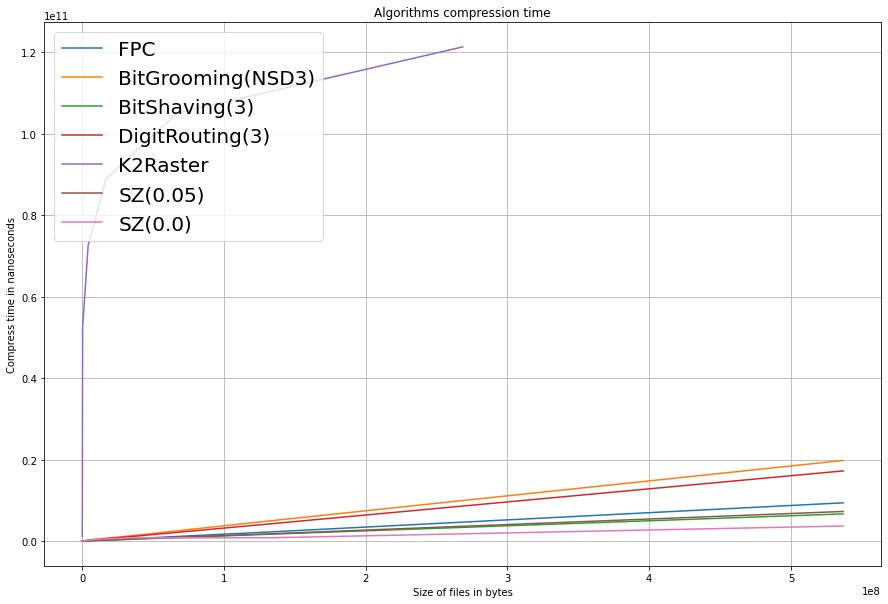

In [8]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
plt.plot(K2RasterS['Time'], label = 'K2Raster')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')
plt.plot(SZ0['Time'], label = 'SZ(0.0)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the compression time on the file size for lossy compression algorithms

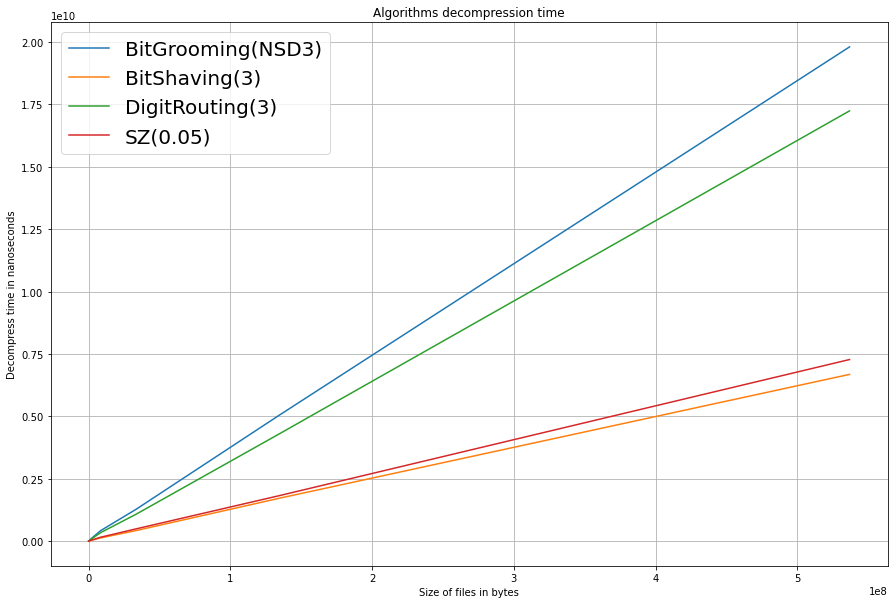

In [9]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the compression time on the file size for lossless compression algorithms

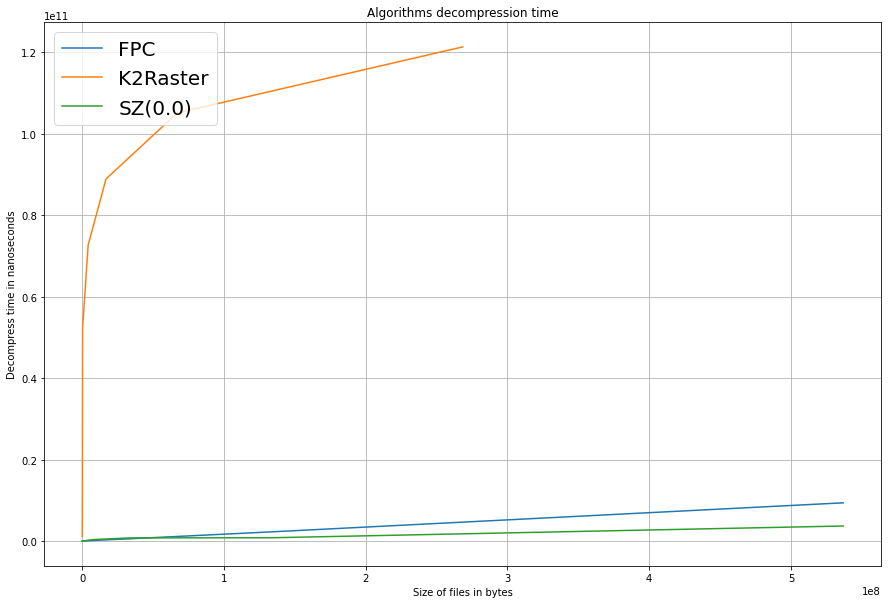

In [10]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(K2RasterS['Time'], label = 'K2Raster')
plt.plot(SZ0['Time'], label = 'SZ(0.0)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the decompression time on the file size<br>

In [11]:
FPC = dataset[(dataset['Name'] == 'FPC') & (dataset['Type'] == 'D')]
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'D')]
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'D')]
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'D')]
K2Raster = dataset[(dataset['Name'] == 'K2Raster') & (dataset['Type'] == 'D')]
SZ = dataset[(dataset['Name'] == 'SZ') & (dataset['Type'] == 'D')]

In [12]:
FPCTS = FPC[['Time', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
K2RasterS = K2Raster[['Time', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Time', 'Size']].groupby(['Size']).mean()
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Time', 'Size']].groupby(['Size']).mean()

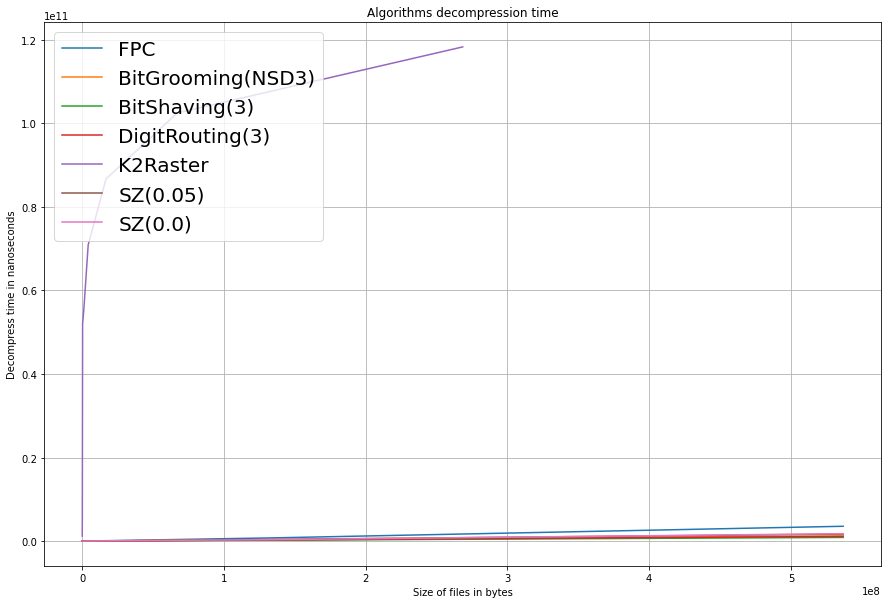

In [13]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
plt.plot(K2RasterS['Time'], label = 'K2Raster')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')
plt.plot(SZ0['Time'], label = 'SZ(0.0)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the decompression time on the file size for lossy compression algorithms 

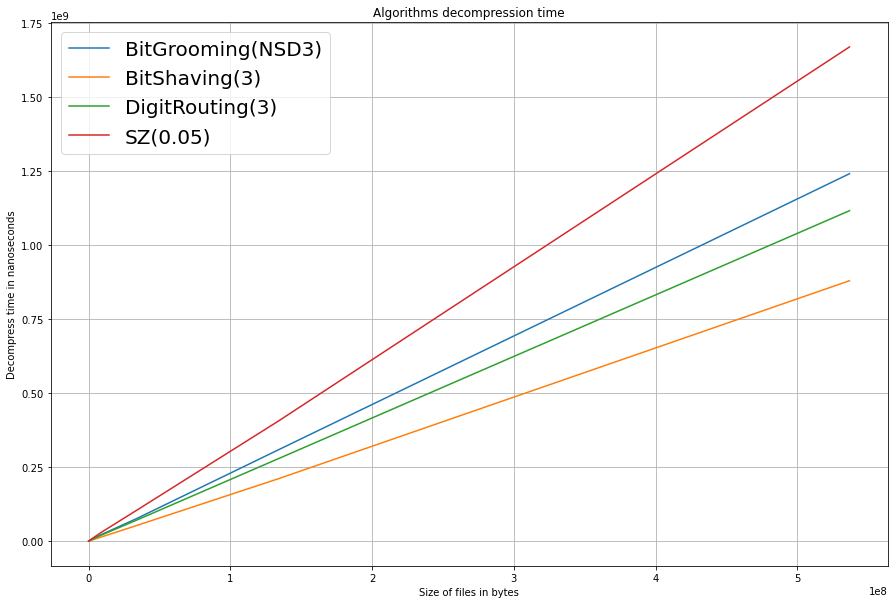

In [14]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the decompression time on the file size for lossless compression algorithms

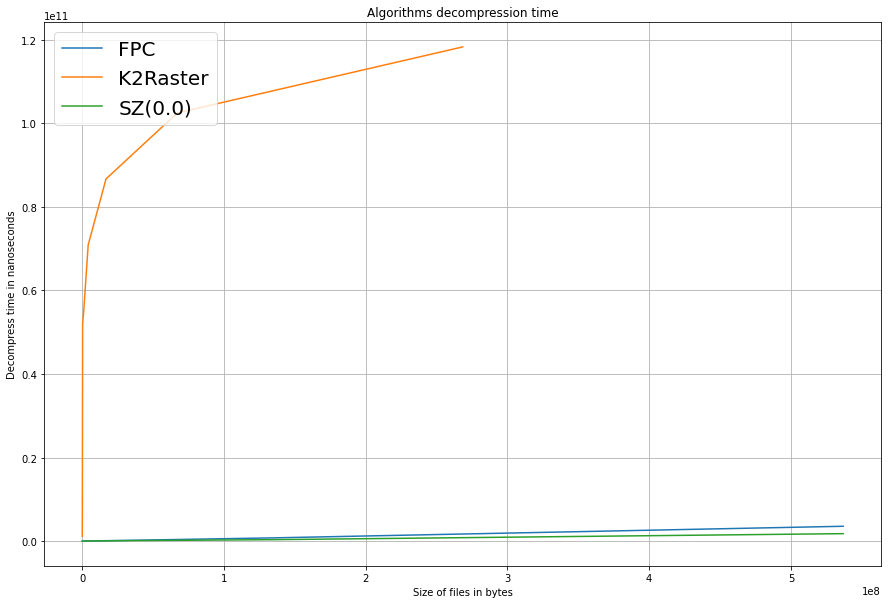

In [15]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(K2RasterS['Time'], label = 'K2Raster')
plt.plot(SZ0['Time'], label = 'SZ(0.0)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the BitGrooming compression and decompression time on the file size<br>

## Compression

In [16]:
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'C')]
BGTS1 = BG[BG['Parameters'] == 'NSD1'][['Time', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BGTS7 = BG[BG['Parameters'] == 'NSD7'][['Time', 'Size']].groupby(['Size']).mean()
BGTS13 = BG[BG['Parameters'] == 'NSD13'][['Time', 'Size']].groupby(['Size']).mean()

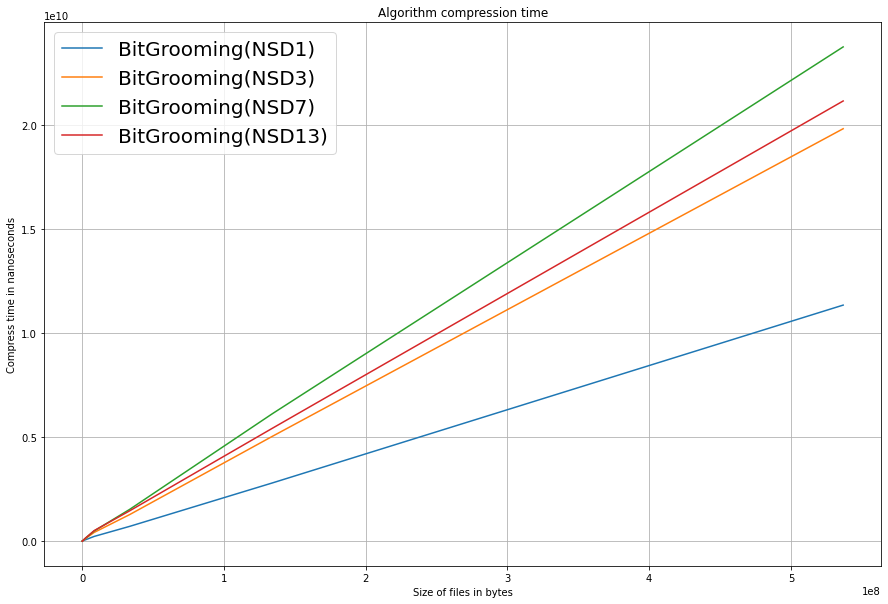

In [17]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS1['Time'], label = 'BitGrooming(NSD1)')
plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BGTS7['Time'], label = 'BitGrooming(NSD7)')
plt.plot(BGTS13['Time'], label = 'BitGrooming(NSD13)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

## Decompression

In [18]:
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'D')]
BGTS1 = BG[BG['Parameters'] == 'NSD1'][['Time', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BGTS7 = BG[BG['Parameters'] == 'NSD7'][['Time', 'Size']].groupby(['Size']).mean()
BGTS13 = BG[BG['Parameters'] == 'NSD13'][['Time', 'Size']].groupby(['Size']).mean()

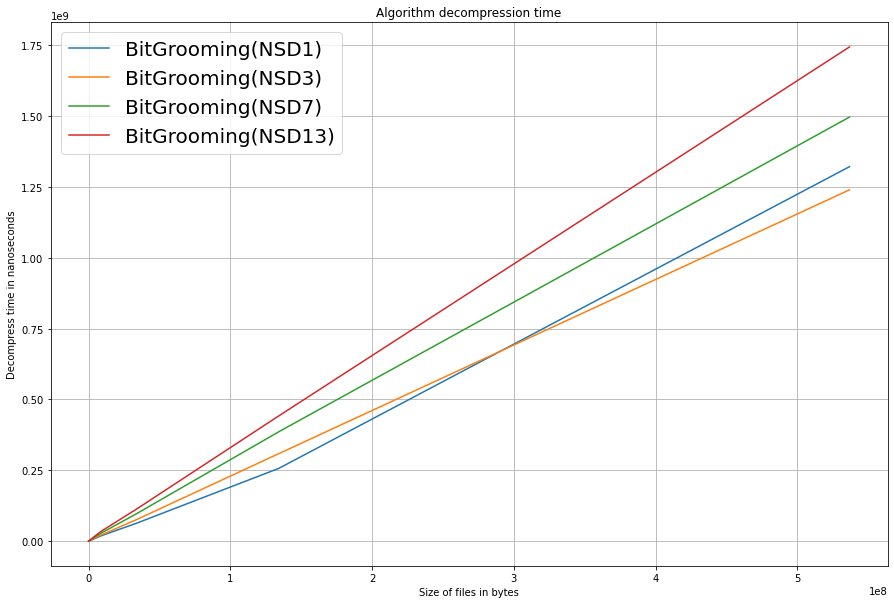

In [19]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS1['Time'], label = 'BitGrooming(NSD1)')
plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BGTS7['Time'], label = 'BitGrooming(NSD7)')
plt.plot(BGTS13['Time'], label = 'BitGrooming(NSD13)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the BitShaving compression and decompression time on the file size<br>

## Compression

In [20]:
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'C')]
BSHTS3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS10 = BSH[BSH['Parameters'] == '10'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS20 = BSH[BSH['Parameters'] == '20'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS30 = BSH[BSH['Parameters'] == '30'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS40 = BSH[BSH['Parameters'] == '40'][['Time', 'Size']].groupby(['Size']).mean()

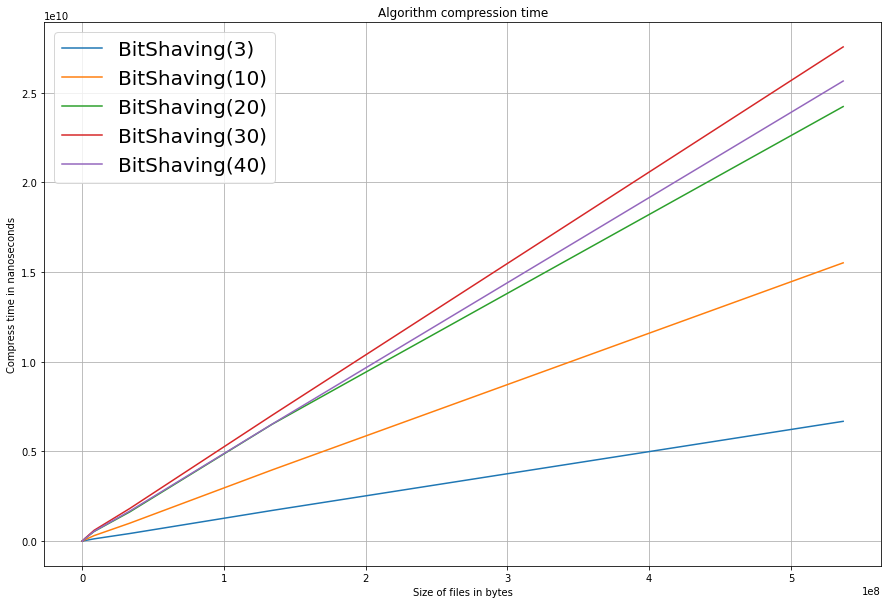

In [21]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Time'], label = 'BitShaving(3)')
plt.plot(BSHTS10['Time'], label = 'BitShaving(10)')
plt.plot(BSHTS20['Time'], label = 'BitShaving(20)')
plt.plot(BSHTS30['Time'], label = 'BitShaving(30)')
plt.plot(BSHTS40['Time'], label = 'BitShaving(40)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

## Decompression

In [22]:
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'D')]
BSHTS3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS10 = BSH[BSH['Parameters'] == '10'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS20 = BSH[BSH['Parameters'] == '20'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS30 = BSH[BSH['Parameters'] == '30'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS40 = BSH[BSH['Parameters'] == '40'][['Time', 'Size']].groupby(['Size']).mean()

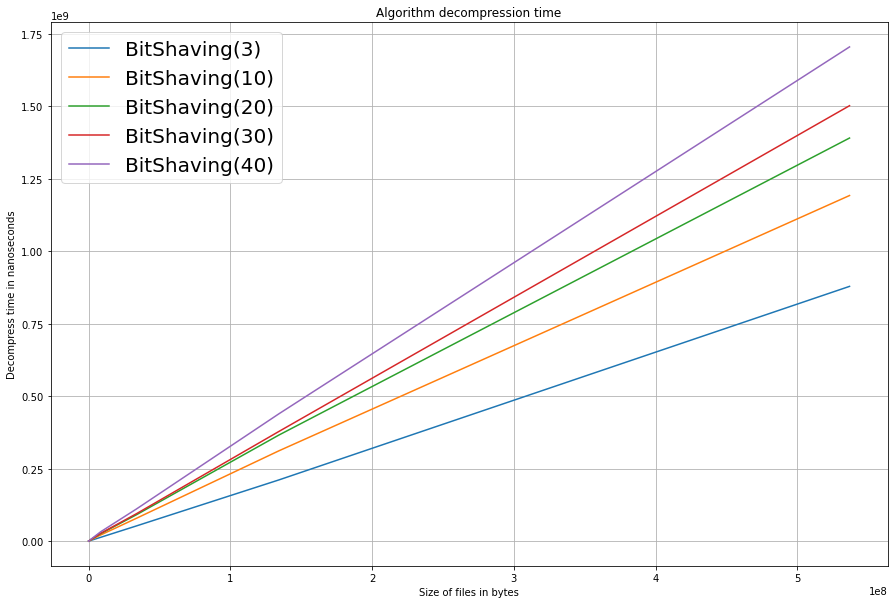

In [23]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Time'], label = 'BitShaving(3)')
plt.plot(BSHTS10['Time'], label = 'BitShaving(10)')
plt.plot(BSHTS20['Time'], label = 'BitShaving(20)')
plt.plot(BSHTS30['Time'], label = 'BitShaving(30)')
plt.plot(BSHTS40['Time'], label = 'BitShaving(40)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the DigitRouting compression and decompression time on the file size<br>

## Compression

In [24]:
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'C')]
DRHTS3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DRTS10 = BSH[BSH['Parameters'] == '10'][['Time', 'Size']].groupby(['Size']).mean()
DRTS20 = BSH[BSH['Parameters'] == '20'][['Time', 'Size']].groupby(['Size']).mean()
DRTS30 = BSH[BSH['Parameters'] == '30'][['Time', 'Size']].groupby(['Size']).mean()
DRTS40 = BSH[BSH['Parameters'] == '40'][['Time', 'Size']].groupby(['Size']).mean()

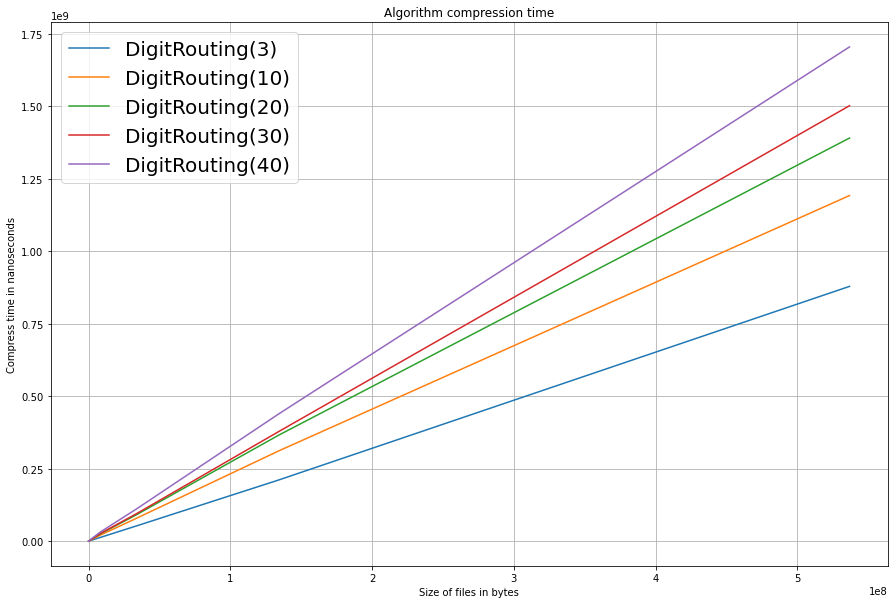

In [25]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Time'], label = 'DigitRouting(3)')
plt.plot(BSHTS10['Time'], label = 'DigitRouting(10)')
plt.plot(BSHTS20['Time'], label = 'DigitRouting(20)')
plt.plot(BSHTS30['Time'], label = 'DigitRouting(30)')
plt.plot(BSHTS40['Time'], label = 'DigitRouting(40)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

## Decomression

In [26]:
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'D')]
DRHTS3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DRTS10 = BSH[BSH['Parameters'] == '10'][['Time', 'Size']].groupby(['Size']).mean()
DRTS20 = BSH[BSH['Parameters'] == '20'][['Time', 'Size']].groupby(['Size']).mean()
DRTS30 = BSH[BSH['Parameters'] == '30'][['Time', 'Size']].groupby(['Size']).mean()
DRTS40 = BSH[BSH['Parameters'] == '40'][['Time', 'Size']].groupby(['Size']).mean()

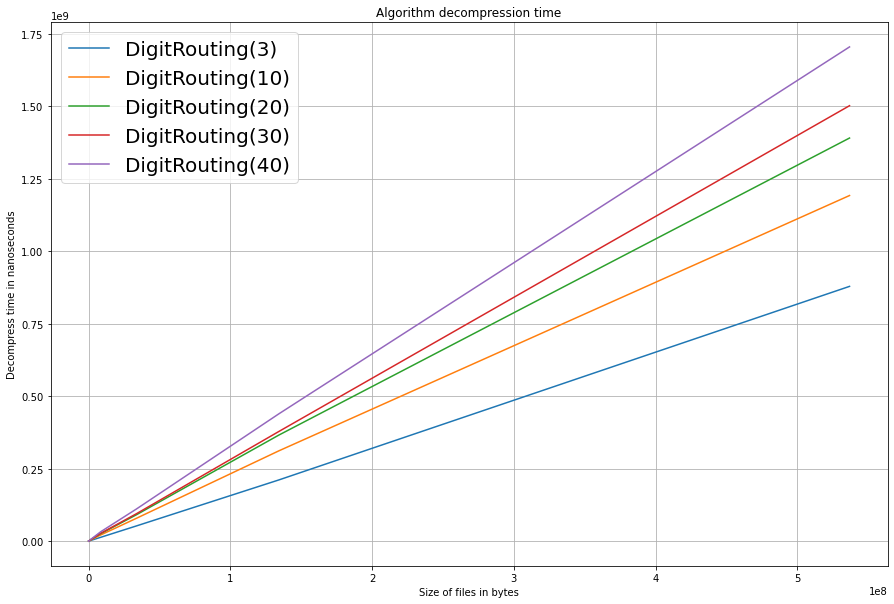

In [27]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Time'], label = 'DigitRouting(3)')
plt.plot(BSHTS10['Time'], label = 'DigitRouting(10)')
plt.plot(BSHTS20['Time'], label = 'DigitRouting(20)')
plt.plot(BSHTS30['Time'], label = 'DigitRouting(30)')
plt.plot(BSHTS40['Time'], label = 'DigitRouting(40)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the SZ compression and decompression time on the file size

# Compression

In [28]:
SZ = dataset[(dataset['Name'] == 'SZ') & (dataset['Type'] == 'C')]
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Time', 'Size']].groupby(['Size']).mean()
SZ001 = SZ[SZ['Parameters'] == '0.01'][['Time', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Time', 'Size']].groupby(['Size']).mean()
SZ01 = SZ[SZ['Parameters'] == '0.1'][['Time', 'Size']].groupby(['Size']).mean()
SZ02 = SZ[SZ['Parameters'] == '0.2'][['Time', 'Size']].groupby(['Size']).mean()
SZ03 = SZ[SZ['Parameters'] == '0.3'][['Time', 'Size']].groupby(['Size']).mean()

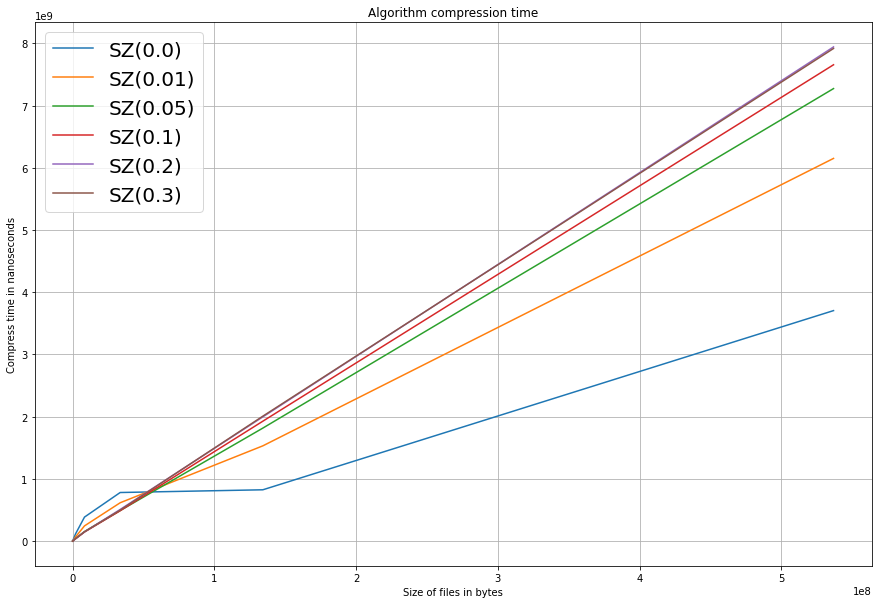

In [29]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(SZ0['Time'], label = 'SZ(0.0)')
plt.plot(SZ001['Time'], label = 'SZ(0.01)')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')
plt.plot(SZ01['Time'], label = 'SZ(0.1)')
plt.plot(SZ02['Time'], label = 'SZ(0.2)')
plt.plot(SZ03['Time'], label = 'SZ(0.3)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Decompression

In [30]:
SZ = dataset[(dataset['Name'] == 'SZ') & (dataset['Type'] == 'D')]
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Time', 'Size']].groupby(['Size']).mean()
SZ001 = SZ[SZ['Parameters'] == '0.01'][['Time', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Time', 'Size']].groupby(['Size']).mean()
SZ01 = SZ[SZ['Parameters'] == '0.1'][['Time', 'Size']].groupby(['Size']).mean()
SZ02 = SZ[SZ['Parameters'] == '0.2'][['Time', 'Size']].groupby(['Size']).mean()
SZ03 = SZ[SZ['Parameters'] == '0.3'][['Time', 'Size']].groupby(['Size']).mean()

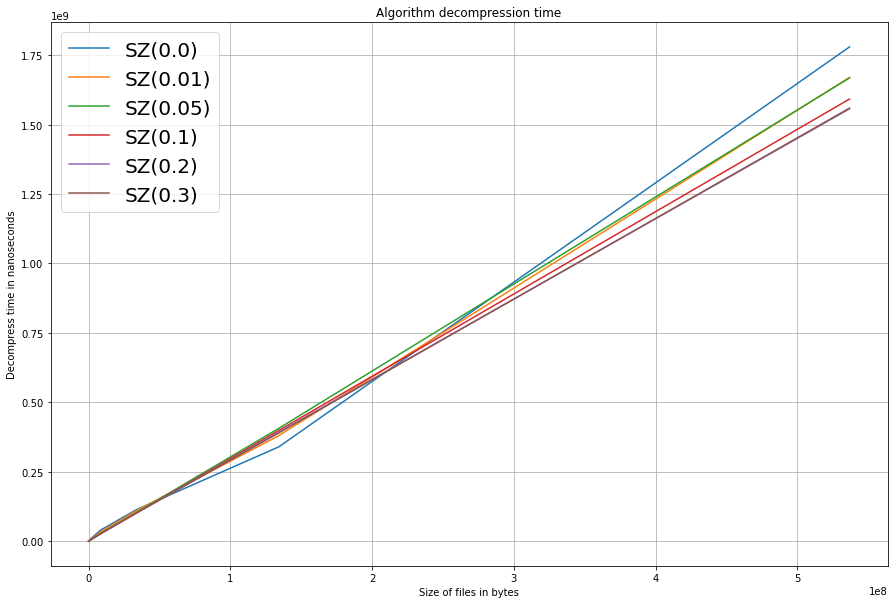

In [31]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(SZ0['Time'], label = 'SZ(0.0)')
plt.plot(SZ001['Time'], label = 'SZ(0.01)')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')
plt.plot(SZ01['Time'], label = 'SZ(0.1)')
plt.plot(SZ02['Time'], label = 'SZ(0.2)')
plt.plot(SZ03['Time'], label = 'SZ(0.3)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size<br>

In [32]:
FPCTS = FPC[['Ratio', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Ratio', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
K2RasterR = K2Raster[['Ratio', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Ratio', 'Size']].groupby(['Size']).mean()
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Ratio', 'Size']].groupby(['Size']).mean()

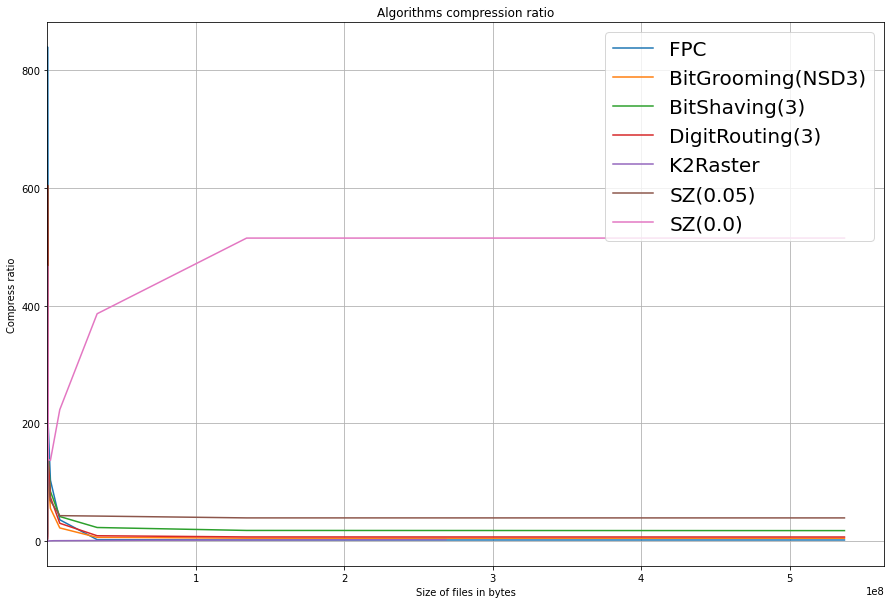

In [33]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Ratio'], label = 'FPC')
plt.plot(BGTS3['Ratio'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Ratio'], label = 'BitShaving(3)')
plt.plot(DR3['Ratio'], label = 'DigitRouting(3)')
plt.plot(K2RasterR['Ratio'], label = 'K2Raster')
plt.plot(SZ005['Ratio'], label = 'SZ(0.05)')
plt.plot(SZ0['Ratio'], label = 'SZ(0.0)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for lossy compression algorithms

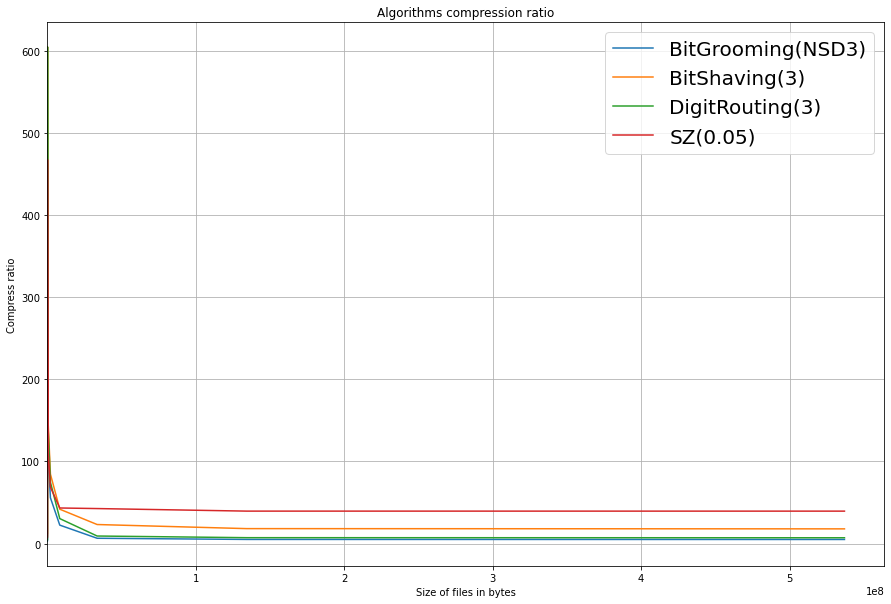

In [34]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Ratio'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Ratio'], label = 'BitShaving(3)')
plt.plot(DR3['Ratio'], label = 'DigitRouting(3)')
plt.plot(SZ005['Ratio'], label = 'SZ(0.05)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for lossless compression algorithms

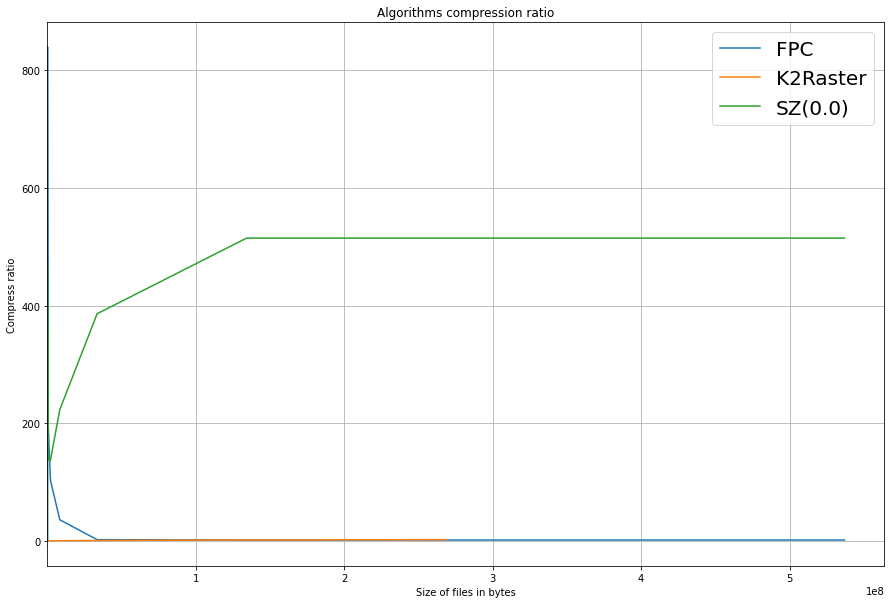

In [35]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Ratio'], label = 'FPC')
plt.plot(K2RasterR['Ratio'], label = 'K2Raster')
plt.plot(SZ0['Ratio'], label = 'SZ(0.0)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for BitGrooming<br>

In [36]:
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'C')]
BGTS1 = BG[BG['Parameters'] == 'NSD1'][['Ratio', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Ratio', 'Size']].groupby(['Size']).mean()
BGTS7 = BG[BG['Parameters'] == 'NSD7'][['Ratio', 'Size']].groupby(['Size']).mean()
BGTS13 = BG[BG['Parameters'] == 'NSD13'][['Ratio', 'Size']].groupby(['Size']).mean()

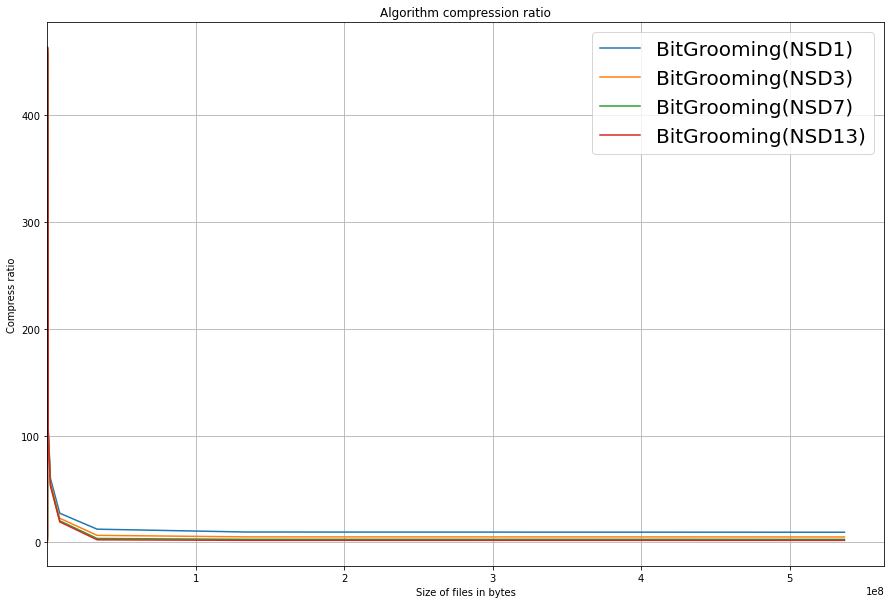

In [37]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS1['Ratio'], label = 'BitGrooming(NSD1)')
plt.plot(BGTS3['Ratio'], label = 'BitGrooming(NSD3)')
plt.plot(BGTS7['Ratio'], label = 'BitGrooming(NSD7)')
plt.plot(BGTS13['Ratio'], label = 'BitGrooming(NSD13)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for BitShaving<br>

In [38]:
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'C')]
BSHTS3 = BSH[BSH['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
BSHTS10 = BSH[BSH['Parameters'] == '10'][['Ratio', 'Size']].groupby(['Size']).mean()
BSHTS20 = BSH[BSH['Parameters'] == '20'][['Ratio', 'Size']].groupby(['Size']).mean()
BSHTS30 = BSH[BSH['Parameters'] == '30'][['Ratio', 'Size']].groupby(['Size']).mean()
BSHTS40 = BSH[BSH['Parameters'] == '40'][['Ratio', 'Size']].groupby(['Size']).mean()

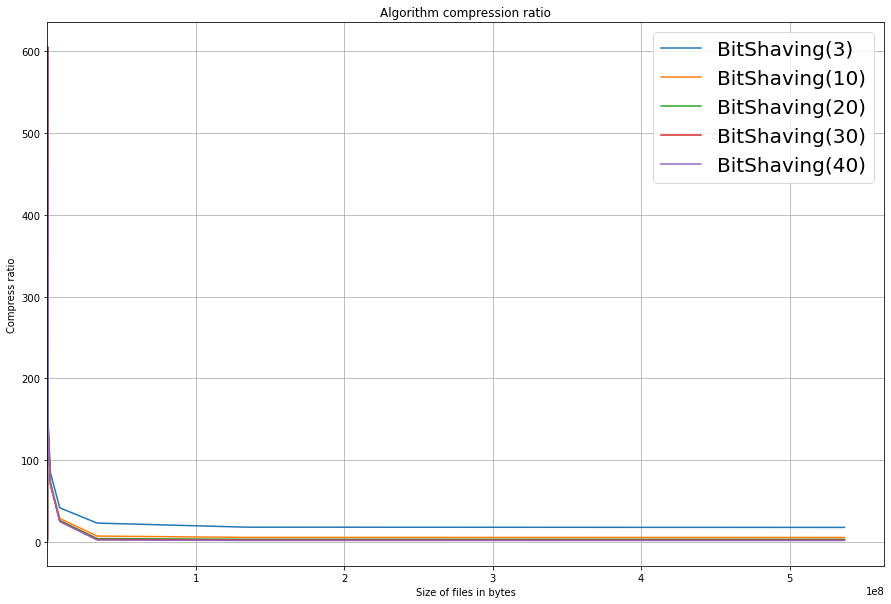

In [39]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Ratio'], label = 'BitShaving(3)')
plt.plot(BSHTS10['Ratio'], label = 'BitShaving(10)')
plt.plot(BSHTS20['Ratio'], label = 'BitShaving(20)')
plt.plot(BSHTS30['Ratio'], label = 'BitShaving(30)')
plt.plot(BSHTS40['Ratio'], label = 'BitShaving(40)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for DigitRouting

In [40]:
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'C')]
DRTS3 = DR[DR['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
DRTS5 = DR[DR['Parameters'] == '5'][['Ratio', 'Size']].groupby(['Size']).mean()
DRTS7 = DR[DR['Parameters'] == '7'][['Ratio', 'Size']].groupby(['Size']).mean()
DRTS10 = DR[DR['Parameters'] == '10'][['Ratio', 'Size']].groupby(['Size']).mean()
DRTS15 = DR[DR['Parameters'] == '15'][['Ratio', 'Size']].groupby(['Size']).mean()

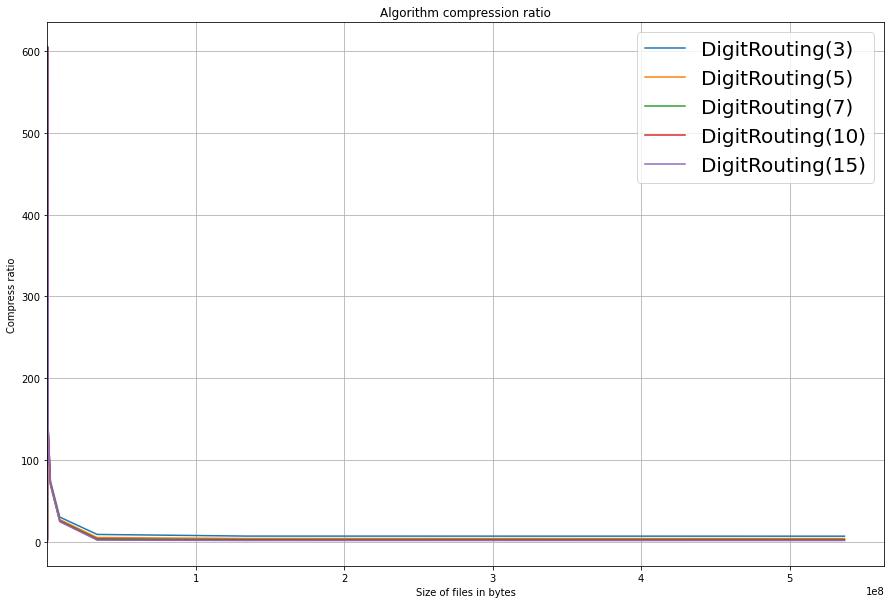

In [41]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(DRTS3['Ratio'], label = 'DigitRouting(3)')
plt.plot(DRTS5['Ratio'], label = 'DigitRouting(5)')
plt.plot(DRTS7['Ratio'], label = 'DigitRouting(7)')
plt.plot(DRTS10['Ratio'], label = 'DigitRouting(10)')
plt.plot(DRTS15['Ratio'], label = 'DigitRouting(15)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for SZ

In [42]:
SZ = dataset[(dataset['Name'] == 'SZ') & (dataset['Type'] == 'D')]
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Ratio', 'Size']].groupby(['Size']).mean()
SZ001 = SZ[SZ['Parameters'] == '0.01'][['Ratio', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Ratio', 'Size']].groupby(['Size']).mean()
SZ01 = SZ[SZ['Parameters'] == '0.1'][['Ratio', 'Size']].groupby(['Size']).mean()
SZ02 = SZ[SZ['Parameters'] == '0.2'][['Ratio', 'Size']].groupby(['Size']).mean()
SZ03 = SZ[SZ['Parameters'] == '0.3'][['Ratio', 'Size']].groupby(['Size']).mean()

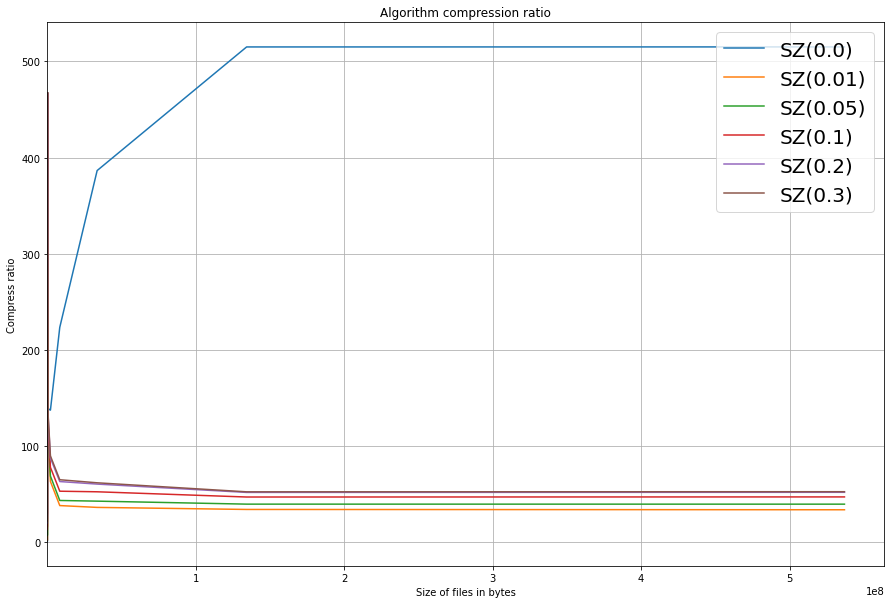

In [43]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(SZ0['Ratio'], label = 'SZ(0.0)')
plt.plot(SZ001['Ratio'], label = 'SZ(0.01)')
plt.plot(SZ005['Ratio'], label = 'SZ(0.05)')
plt.plot(SZ01['Ratio'], label = 'SZ(0.1)')
plt.plot(SZ02['Ratio'], label = 'SZ(0.2)')
plt.plot(SZ03['Ratio'], label = 'SZ(0.3)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()